# EDA 탐색적데이터분석
- 25.06.23(월) 7주차 오후수업

**1. 1차원데이터분석**

**1.** **변수종류파악( 수치형/ 범주형/ 시간형)**

**2.** **변수종류별분석지표( 수치형/ 범주형/ 시간형)**

**3.** **시각화**

- **도수분포표/ 히스토그램/ 상자그림**

**2. 2차원데이터분석**

**1.** **공분산/ 상관계수**

**2.** **다중공선성확인**

**3.** **시각화**

- **산점도/ 회귀직선/ 히트맵**

출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

- airline : 항공사
- carrier_deay : 항공사 지연 요인
- atc_delay : ATC 항공교통관제 지연 요인
- weather_delay : 날씨로 인한 지연 요인

In [50]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/airline_stats.csv")
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [51]:
number_df = df[["pct_atc_delay", "pct_atc_delay", "pct_weather_delay"]]
number_df

,pct_atc_delay,pct_atc_delay,pct_weather_delay
0,1.971774,1.971774,0.762097
1,3.706107,3.706107,1.585878
2,2.706231,2.706231,2.026706
3,11.033333,11.033333,0.000000
4,3.365591,3.365591,1.774194
...,...,...,...
33463,8.798491,8.798491,1.651940
33464,3.591133,3.591133,0.261084
33465,2.664179,2.664179,0.343284
33466,1.964520,1.964520,0.122817


In [52]:
cate_df = df[["airline"]]
cate_df

,airline
0,American
1,American
2,American
3,American
4,American
...,...
33463,Southwest
33464,Southwest
33465,Southwest
33466,Southwest


In [53]:
# 수치형 변수의 최대, 최소, 대푯값
number_df.describe()


,pct_atc_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,5.089962,5.089962,0.684776
std,4.718647,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,2.146565,2.146565,0.000000
50%,3.900000,3.900000,0.316002
75%,6.630238,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [54]:
print(set(cate_df["airline"]))
print(df.airline.value_counts())

{'Alaska', 'Delta', 'Jet Blue', 'Southwest', 'American', 'United'}
airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64


In [55]:
# 항공사 별 기술 통계 비교

df.groupby("airline").describe()


pct_carrier_delay                                               \
                      count      mean       std  min       25%       50%   
airline                                                                    
Alaska               3851.0  3.521889  2.483224  0.0  1.935484  3.225806   
American             5723.0  9.042180  4.139067  0.0  6.338538  8.428571   
Delta                9095.0  6.333460  4.695292  0.0  3.813989  5.548387   
Jet Blue             3773.0  8.081843  3.797737  0.0  5.341176  7.657895   
Southwest            5584.0  7.521997  3.345085  0.0  5.070294  6.960930   
United               5414.0  7.398833  5.369283  0.0  4.034708  6.445210   

                                 pct_atc_delay            ...            \
                 75%         max         count      mean  ...       75%   
airline                                                   ...             
Alaska      4.685599   22.290323        3851.0  5.472672  ...  7.001330   
American   10.988763   50.000000        5723.0  5.993529  ...  7.594450   
Delta       7.821952  100.000000        9095.0  4.462978  ...  5.839901   
Jet Blue   10.280000   28.000000        3773.0  7.345231  ...  9.612903   
Southwest   9.354839   24.800000        5584.0  3.147019  ...  3.790421   
United      9.633110  100.000000        5414.0  5.348133  ...  7.030109   

                      pct_weather_delay                                     \
                  max             count      mean       std  min       25%   
airline                                                                      
Alaska      54.838710            3851.0  0.513497  1.136494  0.0  0.000000   
American    60.000000            5723.0  1.122920  1.097811  0.0  0.296719   
Delta      100.000000            9095.0  0.680765  1.093255  0.0  0.000000   
Jet Blue    40.986111            3773.0  0.465327  0.764147  0.0  0.000000   
Southwest   21.542722            5584.0  0.512611  0.649631  0.0  0.105675   
United     100.000000            5414.0  0.680697  1.338433  0.0  0.000000   

                                          
                50%       75%        max  
airline                                   
Alaska     0.000000  0.497395  14.633803  
American   0.884354  1.641725  12.500000  
Delta      0.316406  0.893346  20.500000  
Jet Blue   0.157312  0.666667   9.923077  
Southwest  0.305598  0.663306   6.240987  
United     0.263780  0.861395  33.333333  

[6 rows x 24 columns]

# 25.06.23 (오후수업)

**1. 1차원데이터분석**

**1.** **변수종류파악( 수치형/ 범주형/ 시간형)**

**2.** **변수종류별분석지표( 수치형/ 범주형/ 시간형)**

**3.** **시각화**

- **도수분포표/ 히스토그램/ 상자그림**

**2. 2차원데이터분석**

**1.** **공분산/ 상관계수**

**2.** **다중공선성확인**

**3.** **시각화**

- **산점도/ 회귀직선/ 히트맵**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv("./data/airline_stats.csv")

import matplotlib.pyplot as plt
import matplotlib as mpl

# 윈도우 기본 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False


In [57]:
df.dtypes  # 변수 타입 확인

# 📌 object → 범주형
# 📌 int64, float64 → 수치형
# 📌 datetime64 → 시간형 (없으면 변환 가능)


pct_carrier_delay    float64
pct_atc_delay        float64
pct_weather_delay    float64
airline               object
dtype: object

| 변수                  | 설명          | 유형  |
| ------------------- | ----------- | --- |
| pct\_carrier\_delay | 항공사 요인 지연   | 수치형 |
| pct\_atc\_delay     | 관제탑(ATC) 지연 | 수치형 |
| pct\_weather\_delay | 날씨 요인 지연    | 수치형 |
| airline             | 항공사명        | 범주형 |


### 1차원 데이터분석

In [58]:
# 수치형 예제 pct_carrier_delay

df['pct_carrier_delay'].describe()


count    33440.000000
mean         7.041475
std          4.497596
min          0.000000
25%          4.145455
50%          6.356893
75%          9.140474
max        100.000000
Name: pct_carrier_delay, dtype: float64

In [59]:
# 수치형 변수들 전체에 대해 기술통계 출력
df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].describe()




,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


## 변수별 분석 지표

In [60]:
# ✅ 수치형

df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].describe()


,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [61]:
# ✅ 범주형

df['airline'].value_counts()


airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

## 1-3. 시각화

- ✅ 도수분포표 (범주형)
- ✅ 히스토그램 (수치형)
- ✅ 상자그림 (수치형)

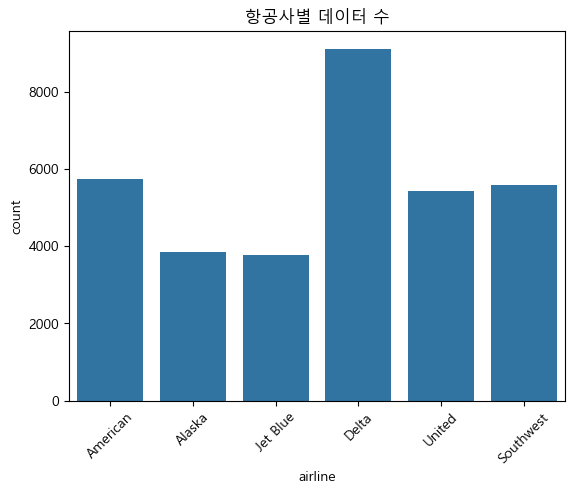

In [62]:
# ✅ 도수분포표 (범주형)

sns.countplot(data=df, x='airline')
plt.title('항공사별 데이터 수')
plt.xticks(rotation=45)
plt.show()


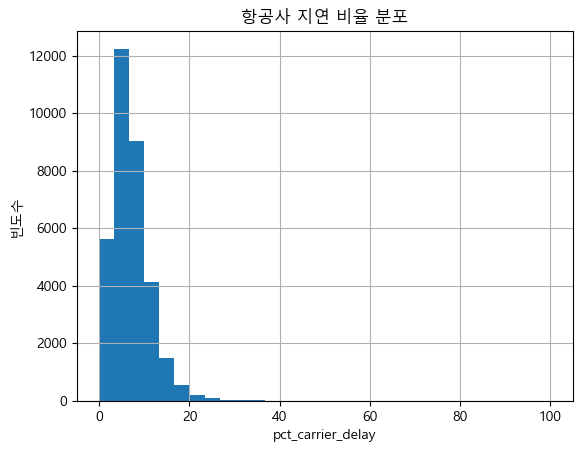

In [63]:
# ✅ 히스토그램 (수치형)

df['pct_carrier_delay'].hist(bins=30)
plt.title('항공사 지연 비율 분포')
plt.xlabel('pct_carrier_delay')
plt.ylabel('빈도수')
plt.show()


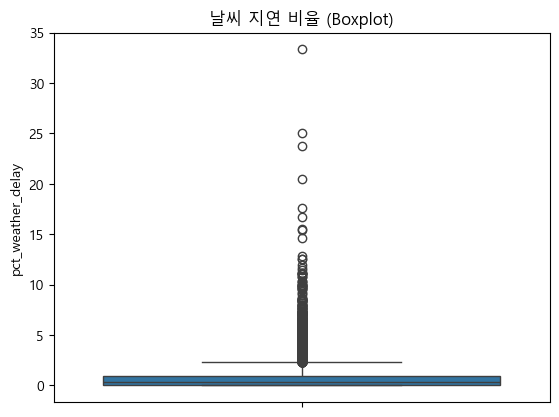

In [64]:
# ✅ 상자그림 (수치형)

sns.boxplot(data=df, y='pct_weather_delay')
plt.title('날씨 지연 비율 (Boxplot)')
plt.show()

## 📙 2. 2차원 데이터 분석

- 2-1. 공분산 / 상관계수
- 2-2. 다중공선성 확인 (VIF)
- 2-3. 시각화
    - ✅ 산점도
    - ✅ 회귀선 포함 산점도
    - ✅ 히트맵




In [65]:
# 2-1. 공분산 / 상관계수

df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].cov()
df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr()


,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


# !pip install statsmodels 

statsmodels는 통계 분석용 라이브러리로,

선형 회귀 분석

VIF (다중공선성 확인)

분산 분석 (ANOVA)

시계열 분석

In [70]:
# 2-2. 다중공선성 확인 (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].dropna()
X = add_constant(X)

pd.DataFrame({
    '변수': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})


,변수,VIF
0,const,4.302727
1,pct_carrier_delay,1.044963
2,pct_atc_delay,1.026353
3,pct_weather_delay,1.031834


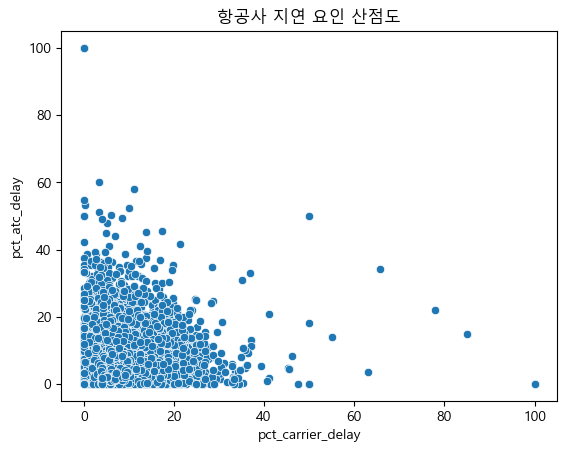

In [ ]:
# 2-3. 시각화 - ✅산점도

sns.scatterplot(data=df, x='pct_carrier_delay', y='pct_atc_delay')
plt.title('항공사 지연 요인 산점도')
plt.show()


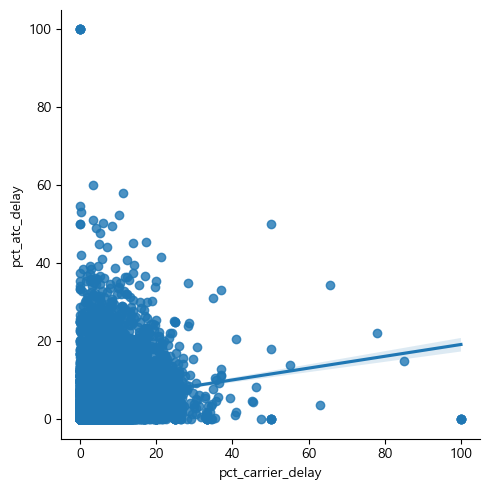

In [ ]:
# 2-3. 시각화 - ✅회귀선 포함 산점도
 
sns.lmplot(data=df, x='pct_carrier_delay', y='pct_atc_delay')


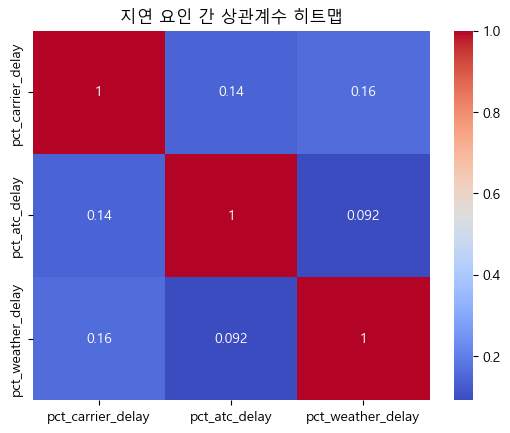

In [74]:
# 2-3. 시각화 ✅ 히트맵


sns.heatmap(df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('지연 요인 간 상관계수 히트맵')
plt.show()
